<a href="https://colab.research.google.com/github/rebsfeitosa/DataScience/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série e filmes listados na Netflix
 
 
Atualmente, a Netflix oferece filmes e séries por streaming e bateu 200 milhões de assinantes em todo o mundo em janeiro de 2021... são mais de 190 países com o serviço disponível. Na plataforma, os assinantes pagam uma mensalidade e têm acesso a milhares de títulos 24 horas por dia.
 
O sucesso da Netflix trouxe muitas mudanças nos processos de 
produção e consumo de conteúdo, que passam a ter uma 
participação maior dos espectadores. Os consumidores da plataforma,
em geral, abandonaram a postura passiva de apenas assistir o que fosse apresentado a eles que é o que acontece com programações de televisão.

#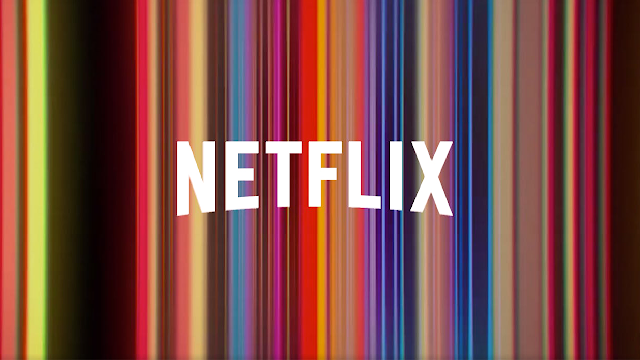

## Objetivo
 
O objetivo principal desse projeto é entender quais os tipos de conteúdo que estão sendo produzidos nos mais diversos países em que a Netflix está presente, em quais gêneros a plataforma mais apostou em produção e taxas importantes de avaliação desses conteúdos.

*Esse dataset foi coletado no site do IMDB e contém as séries e filmes disponíveis na Netflix em 2021.*

In [ ]:
# importando os pacotes necessários 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Para facilitar o acesso aos dados, criei um link com acesso direto ao csv no github. Com isso, basta importar o conjunto de dados usando o método pd.read_csv().*


In [ ]:
# baixar o dataset

df = pd.read_csv('https://raw.githubusercontent.com/rebsfeitosa/DataScience/main/netflix_list.csv')

## Análise exploratória

In [ ]:
# ver as primeiras entradas a fim de fazer uma análise exploratória dos dados

df.head(3)

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...


In [ ]:
# visão geral dos programas com maior avaliação

high_rate = df.loc[(df['rating'] > 9.1), ['title', 'orign_country', 'rating', 'genres', 'numVotes']].sort_values(by=['rating', 'numVotes'], ascending=False).head(10)
high_rate

,title,orign_country,rating,genres,numVotes
6793,Ask the StoryBots,-,9.7,"Adventure,Animation,Comedy",22.0
14,Breaking Bad,United States,9.4,"Crime,Drama,Thriller",1523446.0
3644,Stranger Things: Spotlight,United States,9.4,Talk-Show,73.0
137,Avatar: The Last Airbender,United States,9.3,"Action,Adventure,Animation",260290.0
761,Cosmos: A Spacetime Odyssey,United States,9.3,Documentary,113393.0
1146,Our Planet,United States,9.3,Documentary,35560.0
6669,Fargo,United States,9.3,"Crime,Drama,Thriller",12655.0
590,Word of Honor,China,9.3,"Action,Drama,Fantasy",1864.0
59,Rick and Morty,United States,9.2,"Adventure,Animation,Comedy",394286.0
3636,CM101MMXI Fundamentals,Turkey,9.2,"Comedy,Documentary",44301.0


Alguns programas não têm país de origem da produção (consta como - ) e para uma análise focada nos países, é necessário fazer alteração e limpeza.

In [ ]:
# alterando células sem valores para formato NaN

df.replace('-', np.nan, inplace=True)

In [ ]:
# excluindo dados NaN da coluna país de origem

df.dropna(axis='index', how='any', subset=['orign_country'], inplace=True)

É necessário agrupar e agregar dados para analisar informações de maneira mais prática e limpa.

In [123]:
# agrupando dados por país

country_group = df.groupby(['orign_country'])

In [ ]:
# localizando os 5 países com mais programas produzidos

df['orign_country'].value_counts().head(5)

United States     2836
United Kingdom     508
Japan              406
South Korea        316
India              246
Name: orign_country, dtype: int64

## Descobrindo mediana, média e valor máximo das avaliações por país de origem

In [ ]:
cntry = country_group['rating'].agg(['median', 'mean', 'max']).loc[['United States', 'United Kingdom', 'Japan', 'South Korea', 'India']].head(5)
cntry.reset_index(inplace=True)

cntry.head()

,orign_country,median,mean,max
0,United States,6.80,6.645197,9.4
1,United Kingdom,7.20,7.085256,9.1
2,Japan,7.25,7.146875,9.1
3,South Korea,7.60,7.443390,9.1
4,India,6.60,6.288688,9.1


## Mediana e valor máximo das avaliações de conteúdos produzidos por país (cinco países com maior quantidade de programas produzidos)

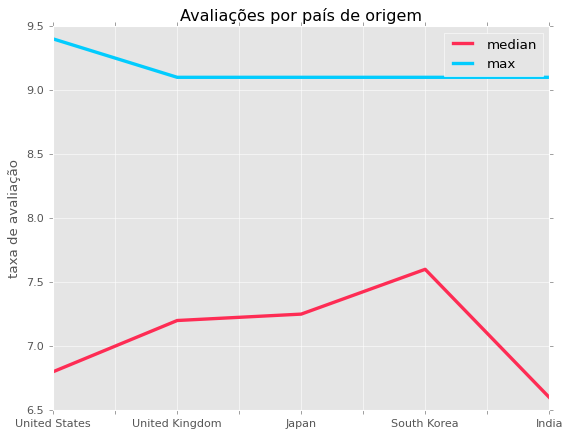

In [113]:
cntry.plot('orign_country', ['median', 'max'], linewidth=3, color=['#fe2c54', '#02ccfe'])

plt.title('Avaliações por país de origem')
plt.xlabel('')
plt.ylabel('taxa de avaliação')


# selecionar o estilo dos gráficos

plt.style.use('ggplot')

## Descobrindo o total de programas por gênero e país 

In [124]:
country_group['genres'].value_counts()

orign_country  genres                       
Albania        Crime,Drama,Thriller              1
Argentina      Comedy                           12
               Drama                             9
               Crime,Drama,Mystery               3
               Crime,Drama,Thriller              3
                                                ..
Uruguay        Biography,Documentary,Music       1
Venezuela      Biography,Documentary,History     1
Vietnam        Action,Drama,Thriller             1
               Comedy,Horror                     1
               Documentary,Music                 1
Name: genres, Length: 1869, dtype: int64

Descobrindo o total de programas dividos nos principais gêneros por país de origem. É necessário fazer uma filtragem por nome dos gêneros, pois muitos programas possuem mais de um gênero.

In [128]:
# contagem de shows por país

cntry_numshows = df['orign_country'].value_counts()

# contagem de comédias por país

cntry_comedy = country_group['genres'].apply(lambda x: x.str.contains('Comedy').sum())

# contagem de documentário por país

cntry_doc = country_group['genres'].apply(lambda x: x.str.contains('Documentary').sum())

# contagem de drama por país

cntry_drama = country_group['genres'].apply(lambda x: x.str.contains('Drama').sum())

# contagem de ação por país

cntry_action = country_group['genres'].apply(lambda x: x.str.contains('Action').sum())

# contagem de romance por país

cntry_rom = country_group['genres'].apply(lambda x: x.str.contains('Romance').sum())

Agora que os valores foram filtrados, podemos colocá-los em uma tabela para relacioná-los com os países e comparar.

In [129]:
# concatenando valores 

CntryGen_df = pd.concat([cntry_numshows, cntry_comedy, cntry_doc, cntry_drama, cntry_action, cntry_rom], axis='columns', sort=False)
CntryGen_df.head(6)

,orign_country,genres,genres,genres,genres,genres
United States,2836,982,595,935,481,183
United Kingdom,508,124,137,207,46,25
Japan,406,101,2,142,192,28
South Korea,316,122,1,188,48,130
India,246,70,11,150,40,37
Canada,203,56,29,76,34,13


É necessário, agora, nomear as colunas de acordo com os gêneros selecionados anteriormente. É importante verificar que os países estão como índices e queremos transformá-los em colunas.

In [130]:
# convertendo os países de index para coluna e alterando nomes das colunas

CntryGen_df.reset_index(inplace=True)

In [132]:
# alterando o nome das colunas e selecionando apenas os 5 países com mais produções desenvolvidas

CntryGen_df.columns = ['orign_country', 'num_shows', 'comedy', 'documentary', 'drama', 'action', 'romance']
CntryGen_df = CntryGen_df.head(5)
CntryGen_df

,orign_country,num_shows,comedy,documentary,drama,action,romance
0,United States,2836,982,595,935,481,183
1,United Kingdom,508,124,137,207,46,25
2,Japan,406,101,2,142,192,28
3,South Korea,316,122,1,188,48,130
4,India,246,70,11,150,40,37


Agora, que os gêneros já foram filtrados e apresentados nas colunas assim como os países de origem das produções, vamos representar esses dados em um gráfico de barras para melhor compreensão.

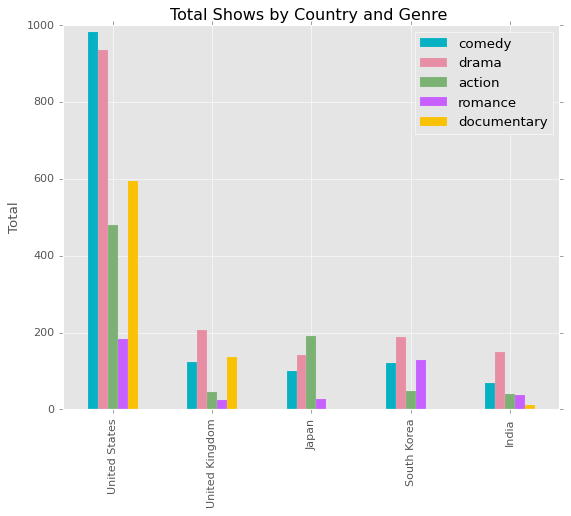

In [133]:
CntryGen_df.plot('orign_country', ['comedy', 'drama', 'action', 'romance', 'documentary'], linewidth=0.1,
                 color=['#06b1c4', '#e78ea5', '#7bb274', '#c760ff', '#fac205'], kind ='bar')

plt.title('Total Shows by Country and Genre ')
plt.xlabel('')
plt.ylabel('Total')

plt.draw()

## Conclusões ##


Foi feita apenas uma análise superficial na base de dados da Netflix, mas foi possível entender um pouco mais sobre o investimento da plataforma em diversos países.

Também se notou que em diferentes localidades os investimentos em produções se diferenciavam em relação aos gêneros dos conteúdos. Quando os Estados Unidos investem massivamente em comédias, o Reino Unido, Coreia do Sul e Índia tem maior propensão a produzir dramas. O japão foi o único dos cinco que mostrou maiores investimentos em programas de ação.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. 